In [2]:
from docx import Document

def count_words_and_letters(file_path):
    # Считываем текст из документа
    text = " ".join([p.text for p in Document(file_path).paragraphs])
    
    # Подсчёт слов
    word_count = len(text.split())
    
    # Подсчёт букв
    letter_count = sum(char.isalpha() for char in text)
    
    return word_count, letter_count

# Пример использования
file_path = "lion.docx"  # Укажите путь к вашему файлу
words, letters = count_words_and_letters(file_path)

print(f"Количество слов: {words}")
print(f"Количество букв: {letters}")


Количество слов: 574007
Количество букв: 2721951


Данные сохранены в файл titanic.csv


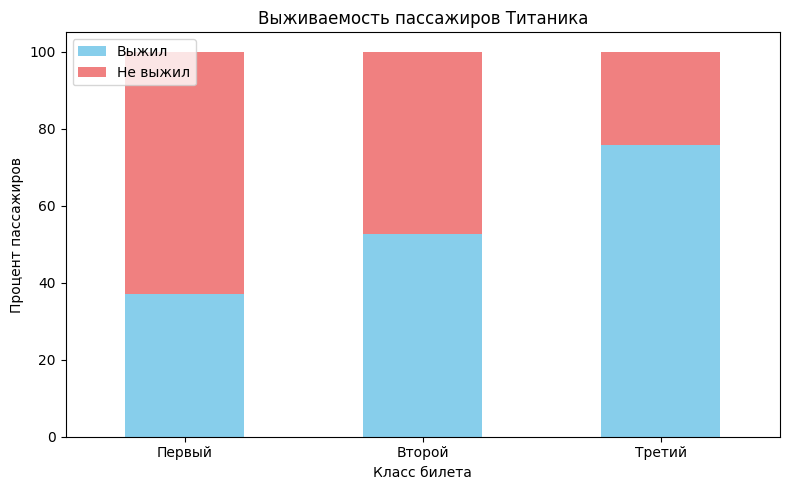

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Основной код
def main():
    # Чтение данных из parquet файла
    data = pd.read_parquet("titanic.parquet")

    # Сохранение данных в формат CSV
    data.to_csv("titanic.csv", index=False)
    print("Данные сохранены в файл titanic.csv")

    # Построение гистограммы
    survival_data = data.groupby(['Pclass', 'Survived']).size().unstack(fill_value=0)
    survival_percent = survival_data.div(survival_data.sum(axis=1), axis=0) * 100

    survival_percent.plot(kind='bar', stacked=True, color=["skyblue", "lightcoral"], figsize=(8, 5))
    plt.title("Выживаемость пассажиров Титаника")
    plt.xlabel("Класс билета")
    plt.ylabel("Процент пассажиров")
    plt.xticks(ticks=range(len(survival_percent.index)), labels=["Первый", "Второй", "Третий"], rotation=0)
    plt.legend(["Выжил", "Не выжил"], loc="upper left")
    plt.tight_layout()
    plt.show()

# Запуск программы
main()
